In [26]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
linestyle = ['-', '-', '-', '-', '-']
fig_width, fig_height = 8, 6

fig_names = [
    "Fig. 1: Result of Pre-Experiment",
]

file_path = "experimental_data.xlsx"

In [27]:
import matplotlib.font_manager as font_manager

# List all fonts available in the Matplotlib font manager
font_list = font_manager.findSystemFonts()
names = []

for font in font_list:
    try:
        prop = font_manager.FontProperties(fname=font)
        name = prop.get_name()
        if name not in names:  # This helps in avoiding duplicates
            names.append(name)
    except Exception as e:
        print(f"Failed to load font: {font}, due to error: {e}")

# Print the sorted list of font names
names.sort()
print("Available fonts for matplotlib:")
for name in names:
    print(name)


Failed to load font: /System/Library/Fonts/Supplemental/NISC18030.ttf, due to error: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
Failed to load font: /Users/timothyweng/Library/Fonts/SourceHanSansTC-VF.otf, due to error: In FT2Font: Can not load face (SFNT font table missing; error code 0x8e)
Failed to load font: /System/Library/Fonts/Apple Color Emoji.ttc, due to error: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
Failed to load font: /Users/timothyweng/Library/Fonts/SourceHanSerifTC-VF.otf, due to error: In FT2Font: Can not load face (SFNT font table missing; error code 0x8e)
Available fonts for matplotlib:
.Aqua Kana
.Keyboard
.LastResort
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh


In [28]:
import matplotlib.pyplot as plt

print(plt.rcParams["font.sans-serif"][0])
print(plt.rcParams["font.monospace"][0])

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["DM Sans"]

DM Sans
DejaVu Sans Mono


In [29]:
from typing import List, Tuple, Optional
import pandas as pd
import numpy as np

def calculate_color_with_alpha(color: str, alpha: float) -> str:
    """Modify a hex color string based on an alpha blending towards white."""
    r, g, b = (int(color[i:i+2], 16) for i in (1, 3, 5))
    new_color = (int(alpha * c + (1 - alpha) * 255) for c in (r, g, b))
    return '#{:02x}{:02x}{:02x}'.format(*new_color)

def read_excel_data(file_path: str, sheet_name: Optional[str] = None) -> List[List[str]]:
    """Read an Excel file into a list of lists, transposed, optionally specifying a sheet name."""
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    transposed_data = df.transpose().values.tolist()
    return transposed_data

def preprocess_data(data: List[List[str]], label_row_index: int = 0, multiply: float = 1) -> Tuple[List[List[float]], List[str]]:
    """Convert transposed data rows into separate lists of measurements and labels.
    Assumes the first row (after transposition) is an identifier and thus skips it for measurements."""
    labels = [row[label_row_index] for row in data]  # Extracting labels
    measurements = [[float(value) * multiply for value in row[label_row_index+1:]] for row in data]  # Extracting data
    return measurements[1:], labels[1:]  # Skipping the first set assuming it's an identifier

def calculate_stats(measurements: List[List[float]]) -> Tuple[List[float], List[float]]:
    """Calculate mean and standard deviation of lists of measurements."""
    means = [np.mean(measurement_list) for measurement_list in measurements]
    std_devs = [np.std(measurement_list) for measurement_list in measurements]
    return means, std_devs

In [50]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def finalize_plot(fig_num):
  # plt.title(fig_names[fig_num - 1], pad=13, fontsize='x-large')
  plt.tight_layout(pad=2)
  # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  plt.savefig(f"fig{fig_num}.png")
  
def draw_pre_exp(sheet_name, fig_num):
  comparison_data = read_excel_data(file_path, sheet_name)
  print(comparison_data)
  labels, TBTs, EYs = [list[1:] for list in comparison_data]
  EYs = [EY*100 for EY in EYs]
  print(labels, TBTs, EYs)

  # Create the line graph
  fig1, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)

  for i in range(len(labels)):
      ax.scatter(TBTs[i], EYs[i], marker='o', s=25, alpha=1, label=labels[i], color=colors[i], zorder=3)

  ax.set_xlabel('Total Brew Time (TBT) (s)', verticalalignment='center_baseline', labelpad=13)
  ax.set_ylabel('Extraction Yield (EY) (%)', verticalalignment='center_baseline', labelpad=13)
  ax.set_xlim(150, 300)
  ax.set_xticks([175, 200, 225, 250, 275])
  ax.set_ylim(20, 22)
  ax.set_yticks([20.5, 21, 21.5])
  ax.xaxis.grid(zorder=0)
  ax.yaxis.grid(zorder=0)
  ax.tick_params(bottom=False)
  
  dots = [mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                        markersize=5, label=label) for color, label in zip(colors, labels)]
  dots.insert(1, mlines.Line2D([], [], color='none', marker='none', linestyle='none'))
  ax.legend(handles=dots, loc='upper right',
              frameon=False, ncol=3, handletextpad=0.5, handlelength=0.5, columnspacing=1)

  finalize_plot(fig_num)

[[nan, 'WWDT', 'CTL-fast', 'CTL-slow'], ['TBT', 263, 187, 269], ['EY', 0.213, 0.2065, 0.2152]]
['WWDT', 'CTL-fast', 'CTL-slow'] [263, 187, 269] [21.3, 20.65, 21.52]


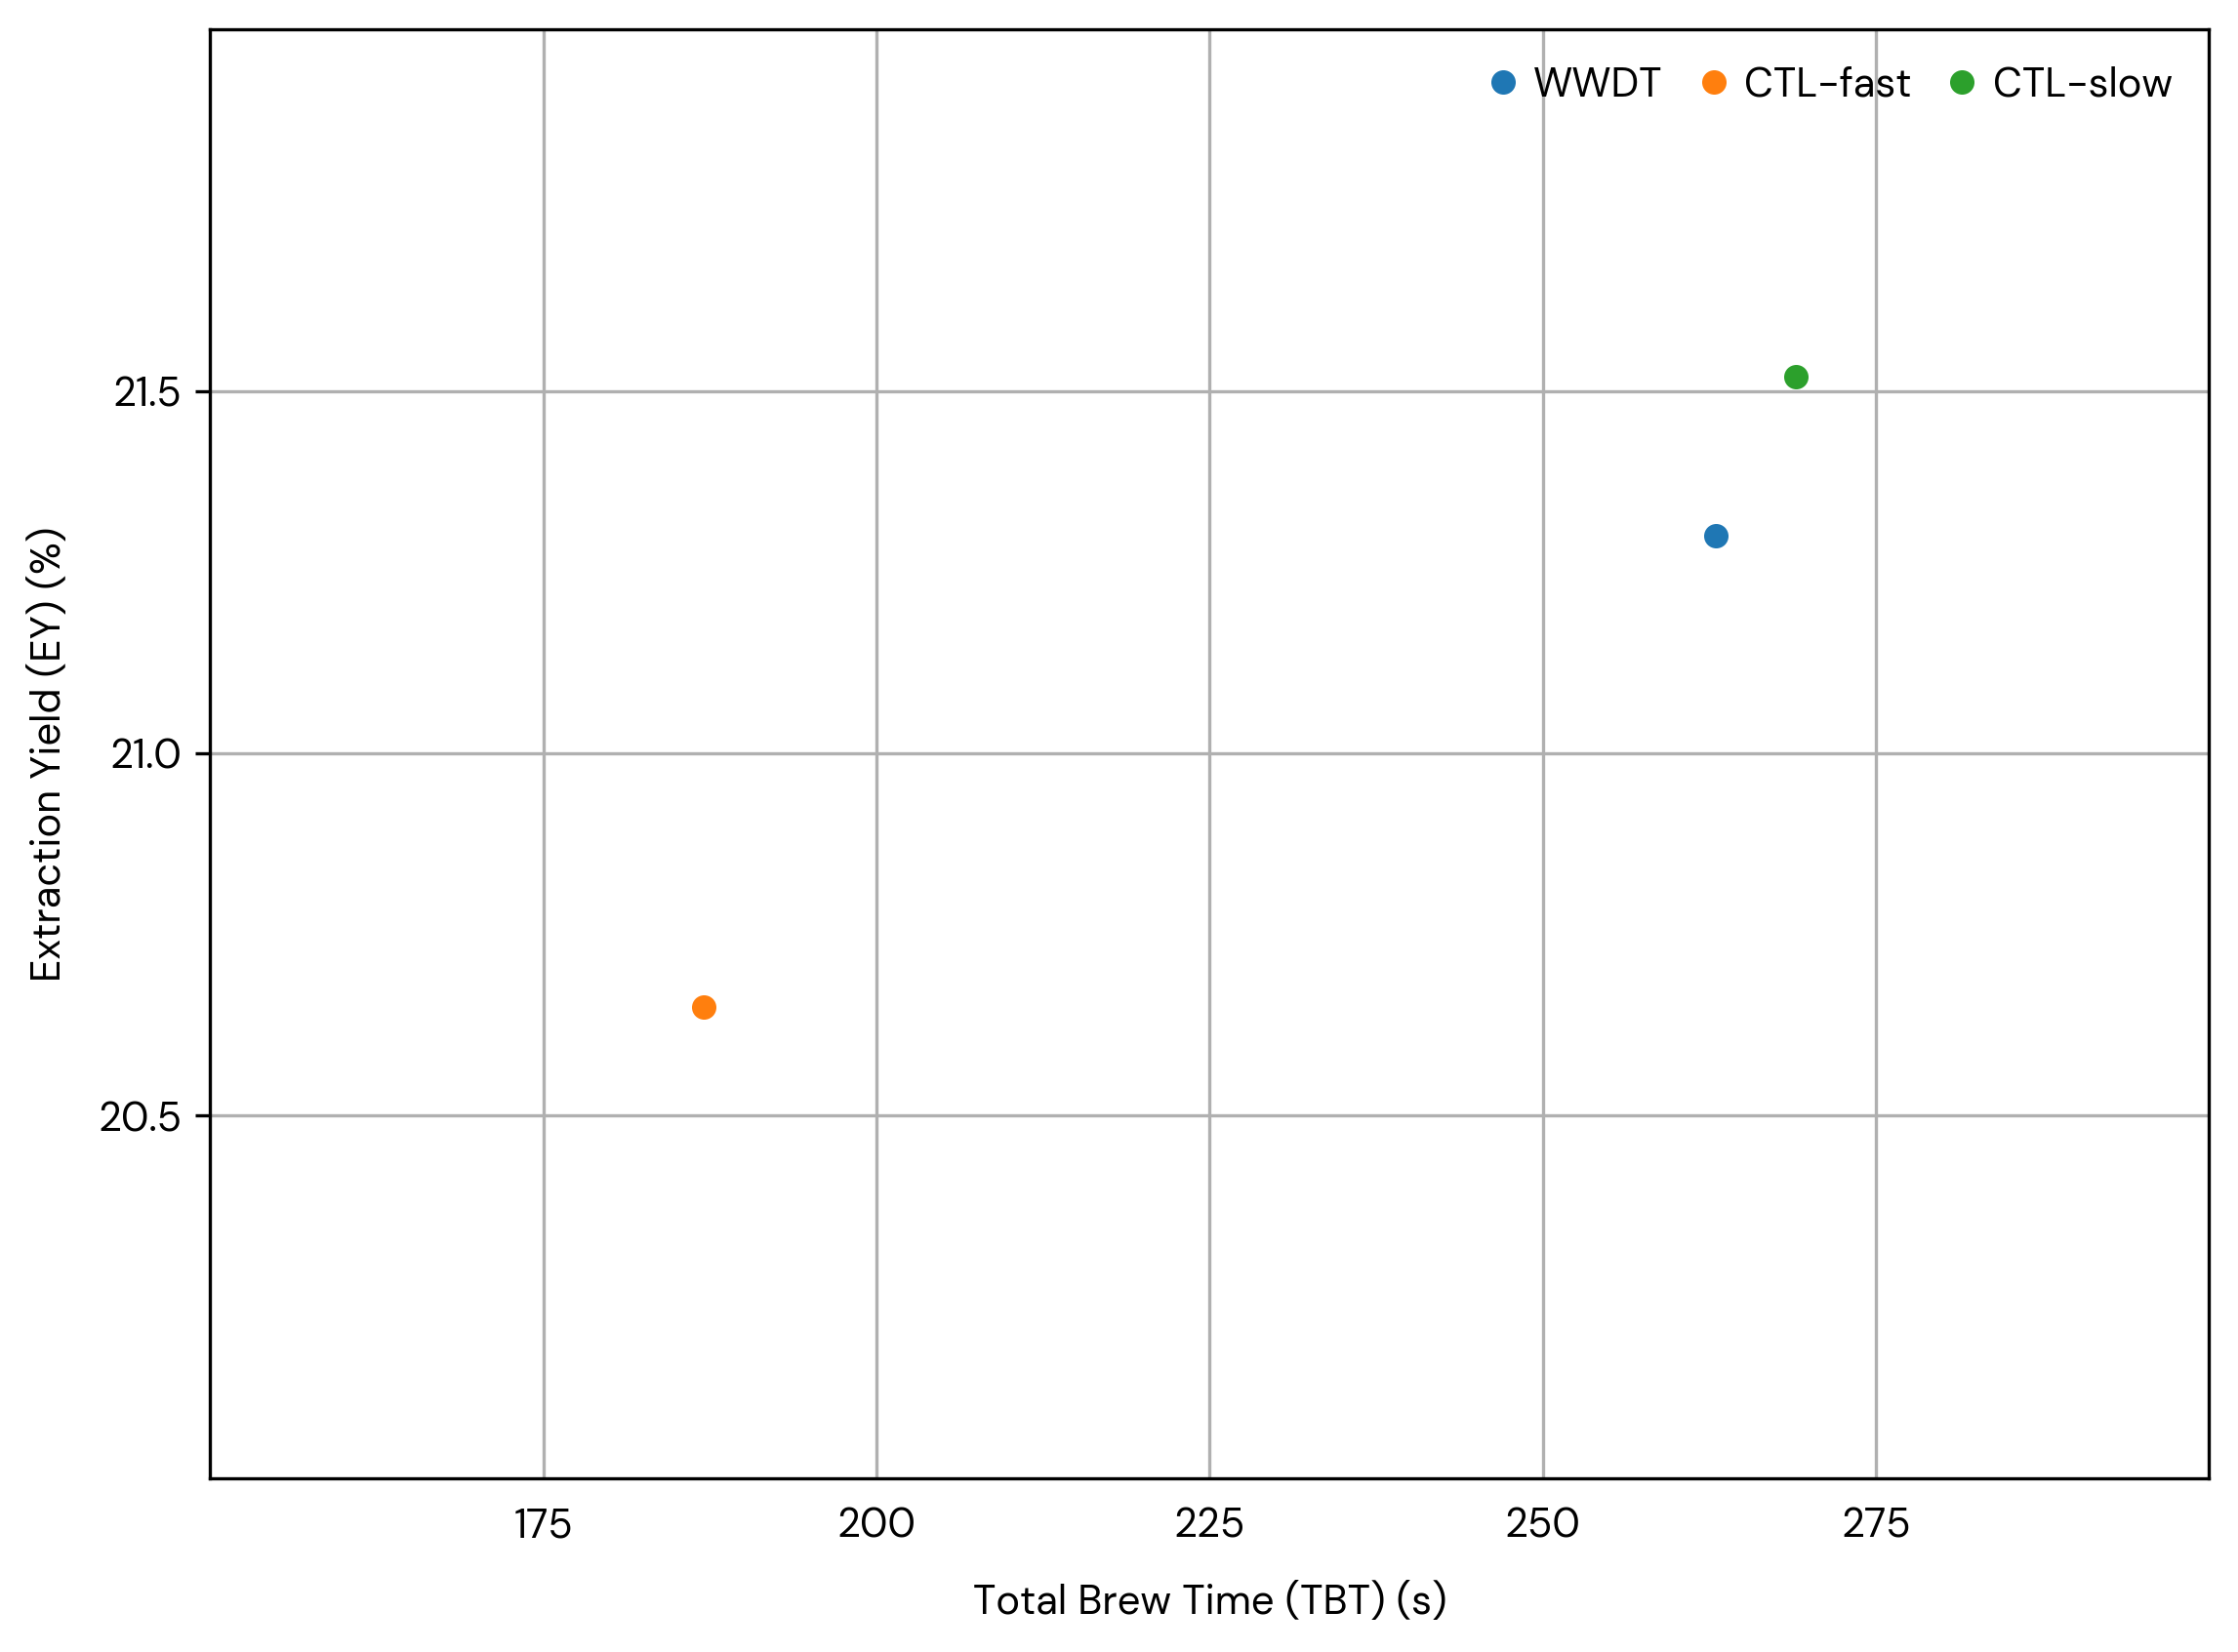

In [51]:
draw_pre_exp('Pre', 1)